In [1]:
pip list

Package                 Version
----------------------- ------------
absl-py                 1.4.0
backcall                0.2.0
beautifulsoup4          4.12.2
cachetools              5.3.1
certifi                 2022.12.7
charset-normalizer      2.1.1
colorama                0.4.6
cycler                  0.11.0
debugpy                 1.7.0
decorator               5.1.1
entrypoints             0.4
fonttools               4.38.0
google-auth             2.22.0
google-auth-oauthlib    0.4.6
grpcio                  1.58.0
idna                    3.4
imageio                 2.31.2
importlib-metadata      6.7.0
ipykernel               6.16.2
ipython                 7.34.0
jedi                    0.19.0
joblib                  1.2.0
jupyter_client          7.4.9
jupyter_core            4.12.0
jupyterlab-pygments     0.2.2
kiwisolver              1.4.4
labelImg                1.8.6
lxml                    4.9.3
Markdown                3.4.4
MarkupSafe              2.1.3
matplotlib           

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from tqdm import tqdm

In [65]:
TEST_DIR = './test_images/'
TRAIN_DIR = './train_images/'
TRAIN_BINARY_DIR = './train_images_binary/'
TRAIN_TWO_DICE_DIR = './train_two_dice_images/'
DATA_DIR = './data/train'

In [4]:
def show_images(images, no_list):
    ncols = 3
    nrows = math.ceil(len(no_list) / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(1.6*ncols, 1.6*nrows), tight_layout=True)
    for i, no in enumerate(no_list):
        x = i % ncols
        y = i // ncols
        image = images[no]
        if nrows == 1:
            axes[x].imshow(image.reshape(20, 20), cmap='gray')
            axes[x].set_title(no)
        else:
            axes[y][x].imshow(image.reshape(20, 20), cmap='gray')
            axes[y][x].set_title(no)


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0,0,0,0,18,6,27,0,0,0,...,55,1,10,34,16,0,25,0,0,0
1,0,6,7,10,0,27,0,0,19,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,78,72,6,34,4,31,0,0,0
3,0,0,33,0,46,0,0,0,22,15,...,0,0,24,7,4,0,0,0,0,6
4,0,15,0,0,0,0,42,0,0,0,...,0,0,0,57,180,22,0,0,0,0


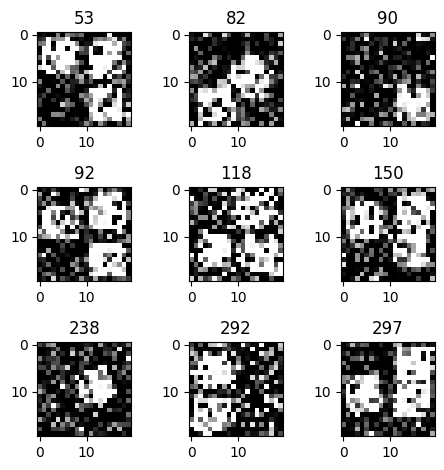

In [5]:

# テスト画像の可視化
images_test = np.load('./X_test.npy')
show_images(images_test, [53, 82, 90, 92, 118, 150, 238, 292, 297])
image_ts_df = pd.DataFrame(images_test)
image_ts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,11,1,1,1,1
3,1,1,1,1,1,1,81,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


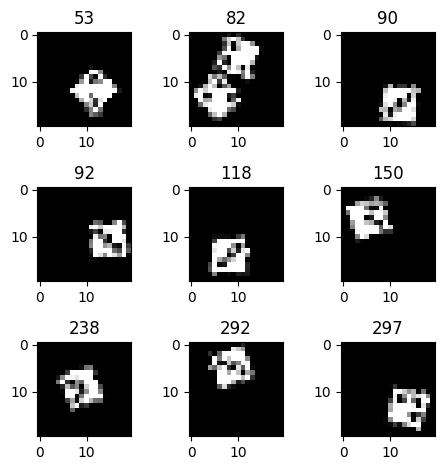

In [6]:
# 訓練画像の可視化
images_train = np.load('./X_train.npy')
show_images(images_train, [53, 82, 90, 92, 118, 150, 238, 292, 297])
image_tr_df = pd.DataFrame(images_train)
image_tr_df.head()

In [7]:
#訓練データのjpg保存
if not os.path.exists(TRAIN_DIR):
    os.mkdir(TRAIN_DIR)
    image_len = len(images_train)
    for i in range(0, image_len):
        img = images_train[i].reshape(20, 20)
        plt.imsave('./train_images/train_image' + str(i) + '.jpg', img, cmap='gray')

In [8]:
#テストデータのjpg保存
if not os.path.exists(TEST_DIR):
    os.mkdir(TEST_DIR)
    image_len = len(images_test)
    for i in range(0, image_len):
        img = images_test[i].reshape(20, 20)
        plt.imsave('./test_images/test_image' + str(i) + '.jpg', img, cmap='gray')

In [9]:
# ダイスの個数の分布を確認するため、画像を2値化して白ピクセルの分布を確認する
if not os.path.exists(TRAIN_BINARY_DIR):
    os.mkdir(TRAIN_BINARY_DIR)
    threshold = 128
    image_len = len(images_train)
    for i in range(0, image_len):
        img = cv2.imread('./train_images/train_image' + str(i) + '.jpg', cv2.IMREAD_GRAYSCALE)
        ret, img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
        cv2.imwrite('./train_images_binary/train_image' + str(i) + '_b.jpg', img)

In [10]:
# 画像一枚当たりの白ピクセルの数をカウントしてヒストグラムを作成する
image_len = len(images_train)
white_pixel_count = []
for i in tqdm(range(0, image_len)):
    img = cv2.imread('./train_images_binary/train_image' + str(i) + '_b.jpg', cv2.IMREAD_GRAYSCALE)
    white_pixel_count.append(np.sum(img == 255))

100%|██████████| 200000/200000 [02:27<00:00, 1359.46it/s]


(array([1.0000e+00, 5.0000e+00, 1.0000e+01, 5.3000e+01, 1.3500e+02,
        4.0100e+02, 8.9000e+02, 1.9030e+03, 3.6860e+03, 5.9600e+03,
        8.5670e+03, 1.1133e+04, 1.2789e+04, 1.3089e+04, 1.2180e+04,
        1.0209e+04, 7.6130e+03, 5.1650e+03, 3.0770e+03, 1.6720e+03,
        8.0900e+02, 3.3100e+02, 1.4100e+02, 5.0000e+01, 1.4000e+01,
        9.0000e+00, 2.8000e+01, 6.0000e+01, 1.4900e+02, 2.6000e+02,
        4.5300e+02, 8.2800e+02, 1.4260e+03, 2.1830e+03, 3.1200e+03,
        4.3210e+03, 5.8000e+03, 7.1020e+03, 8.2720e+03, 8.9900e+03,
        9.5660e+03, 9.2400e+03, 8.6210e+03, 7.7150e+03, 6.4340e+03,
        4.9310e+03, 3.6850e+03, 2.6450e+03, 1.7630e+03, 1.1130e+03,
        6.3400e+02, 3.9400e+02, 1.8300e+02, 9.8000e+01, 5.0000e+01,
        3.0000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([15.        , 15.98333333, 16.96666667, 17.95      , 18.93333333,
        19.91666667, 20.9       , 21.88333333, 22.86666667, 23.85      ,
        24.83333333, 25.81666667, 26

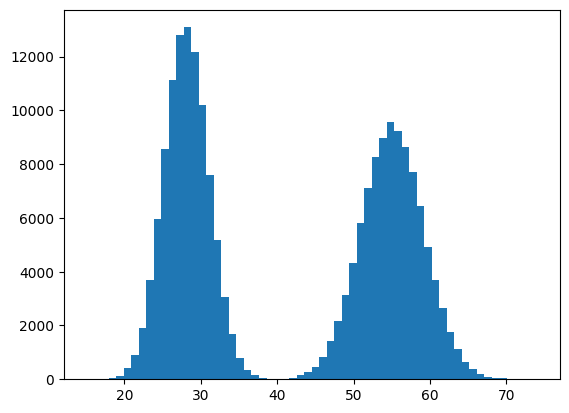

In [11]:
# ヒストグラムを作成
plt.hist(white_pixel_count, bins=60)

In [17]:
# white_pixel_countが40以下の画像の枚数を確認する
count_under40 = 0
count_over40 = 0
for i in white_pixel_count:
    if i < 40:
        count_under40 += 1
count_over40 = image_len - count_under40

print('white_pixel_countが40以下の画像の枚数: ' + str(count_under40))
print('white_pixel_countが40より大きいの画像の枚数: ' + str(count_over40))


white_pixel_countが40以下の画像の枚数: 99883
white_pixel_countが40より大きいの画像の枚数: 100117


In [18]:
# ダイスが2個の画像のみを抽出する
if not os.path.exists(TRAIN_TWO_DICE_DIR):
    os.mkdir(TRAIN_TWO_DICE_DIR)
    count_threshold = 40
    two_dice_index = []
    image_len = len(images_train)
    for i in tqdm(range(0, image_len)):
        if white_pixel_count[i] >= count_threshold:
            img = cv2.imread('./train_images/train_image' + str(i) + '.jpg', cv2.IMREAD_GRAYSCALE)
            cv2.imwrite('./train_two_dice_images/train_image' + str(i) + '.jpg', img)
            two_dice_index.append(i)

100%|██████████| 200000/200000 [01:47<00:00, 1858.37it/s]


In [29]:
# ダイスの合計値の分布を確認する
images_label = np.load('./y_train.npy')
image_label_df = pd.DataFrame(images_label)
image_label_df.head()

,0
0,3
1,2
2,6
3,10
4,1


In [30]:
print(image_label_df.isnull().sum())
print(np.max(image_label_df))
print(np.min(image_label_df))

0    0
dtype: int64
0    12
dtype: uint8
0    1
dtype: uint8


In [36]:
# white_pixel_countをimage_label_dfに追加する
image_label_df['white_pixel_count'] = white_pixel_count

# dice_count列を追加し、white_pixel_countが40以上の場合は2、40未満の場合は1とする
image_label_df['dice_count'] = 0  # 初期値として0を設定
for i in image_label_df.index:
    if image_label_df['white_pixel_count'][i] >= count_threshold:
        image_label_df['dice_count'][i] = 2
    else:
        image_label_df['dice_count'][i] = 1

image_label_df.head(10)

e:\Tomonari\PycharmProjects\DL_Models\venv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
e:\Tomonari\PycharmProjects\DL_Models\venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,white_pixel_count,dice_count
0,3,25,1
1,2,31,1
2,6,56,2
3,10,52,2
4,1,26,1
5,1,32,1
6,7,55,2
7,1,30,1
8,8,58,2
9,4,29,1


In [37]:
# dice_count＝2における、列"0"の値別の個数を確認する
image_label_df[image_label_df['dice_count'] == 2][0].value_counts()

7     16773
6     13997
8     13804
5     11195
9     10996
10     8360
4      8335
3      5520
11     5503
12     2823
2      2806
1         5
Name: 0, dtype: int64

In [40]:
# dice_count＝2における、列"0"が1のindexを確認する
image_label_df[(image_label_df['dice_count'] == 2) & (image_label_df[0] == 1)].index
# →ダイス1個の画像が5枚混入しているが、影響は少ないためそのままにする

Int64Index([27187, 45171, 102046, 145715, 166407], dtype='int64')

In [46]:
# dice_count＝1における、列"0"の値別の個数を確認する
image_label_df[image_label_df['dice_count'] == 1][0].value_counts()

5     16808
1     16751
4     16724
6     16644
3     16557
2     16394
9         2
10        2
11        1
Name: 0, dtype: int64

In [56]:
# アノテーション用の画像を選択するため、dice_count=2から、列"0"の値2～12となるindexを一様分布の確率で以下の数ピックアップする
# 2: 19枚、3: 32枚、4: 62枚、5: 66枚、6: 79枚、7: 84枚、8: 79枚、9: 66枚、10: 62枚、11: 32枚、12: 19枚
SEED = 1234

def select_index(df, num_to_select, number):   
    number_df = df.copy()
    number_df = number_df[number_df['dice_count'] == 2]
    number_df = number_df[(df[0] == number)]
    number_df = number_df.sample(n=num_to_select, random_state=SEED)
    return number_df.index

number_list = [19, 32, 62, 66, 79, 84, 79, 66, 62, 32, 19]
index_list = pd.DataFrame()

for i in range(0, len(number_list)):
    if i == 0:
        index_list = pd.DataFrame({f'{i+2}': select_index(image_label_df, number_list[i], i+2)})
    else:
        new_index = pd.DataFrame({f'{i+2}': select_index(image_label_df, number_list[i], i+2)})
        index_list = pd.concat([index_list, new_index], axis=1)

index_list

e:\Tomonari\PycharmProjects\DL_Models\venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,2,3,4,5,6,7,8,9,10,11,12
0,42631.0,68621.0,23802.0,79910.0,48713.0,183745,183715.0,36648.0,140056.0,760.0,4544.0
1,81815.0,27362.0,820.0,192310.0,138710.0,12206,193506.0,101010.0,124115.0,94480.0,69734.0
2,52487.0,80738.0,104352.0,122292.0,105478.0,48438,195099.0,198239.0,25406.0,104726.0,86200.0
3,148111.0,94834.0,105828.0,798.0,173174.0,104579,33640.0,147689.0,105580.0,65237.0,71273.0
4,73162.0,58888.0,26992.0,170019.0,121548.0,15416,193077.0,156158.0,120905.0,141377.0,27737.0
...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,NaN,NaN,NaN,NaN,97797,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,67930,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,53148,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,197933,NaN,NaN,NaN,NaN,NaN


In [74]:
index_list.values.astype(int)

array([[      42631,       68621,       23802,       79910,       48713,
             183745,      183715,       36648,      140056,         760,
               4544],
       [      81815,       27362,         820,      192310,      138710,
              12206,      193506,      101010,      124115,       94480,
              69734],
       [      52487,       80738,      104352,      122292,      105478,
              48438,      195099,      198239,       25406,      104726,
              86200],
       [     148111,       94834,      105828,         798,      173174,
             104579,       33640,      147689,      105580,       65237,
              71273],
       [      73162,       58888,       26992,      170019,      121548,
              15416,      193077,      156158,      120905,      141377,
              27737],
       [     161458,      146933,      116155,      117436,      115123,
              50293,      130606,       81032,       54498,      137691,
              

In [80]:
# index_listで取得した画像のindexから、画像を読み込んで保存する
if not os.path.exists(DATA_DIR):
    os.mkdir(DATA_DIR)

    # 列ごとにフォルダを分けて画像を保存する
    for i in range(0, len(number_list)):
        if not os.path.exists(DATA_DIR + '/' + str(i+2)):
            os.mkdir(DATA_DIR + '/' + str(i+2))
        for j in index_list.values[:, i]:
            if not np.isnan(j):         # jがnanの場合はスキップする
                j = int(j)
                img = cv2.imread('./train_images/train_image' + str(j) + '.jpg', cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    cv2.imwrite(DATA_DIR + '/' + str(i+2) + '/train_image' + str(j) + '.jpg', img)
                else:
                    print(f"Error: Image {j} could not be read.")

In [33]:
import random
#　ノイズ画像を生成する
img = cv2.imread('./train_images/train_image' + str(11) + '.jpg', cv2.IMREAD_GRAYSCALE)

mean = 0
sigma = 128
sigma = random.uniform(0, sigma)
noise = np.random.normal(0, sigma, np.shape(img))

img_noise = img + noise

img_noise[img_noise > 255] = 255
img_noise[img_noise < 0] = 0

# output_image = img.astype(np.uint8)    # Float -> Uint
# cv2.imwrite('./output.jpg',output_image)
cv2.imwrite('./org.jpg',img)
cv2.imwrite('./noise.jpg',img_noise)

True